<a href="https://colab.research.google.com/github/KartikJ06/SUSTAIN-/blob/main/Sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
train_path = '/content/drive/MyDrive/DATASET/TRAIN'
test_path= '/content/drive/MyDrive/DATASET/TEST'

In [32]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array,load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [33]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 4152/4152 [00:13<00:00, 308.14it/s]


In [34]:
data.shape

(8630, 2)

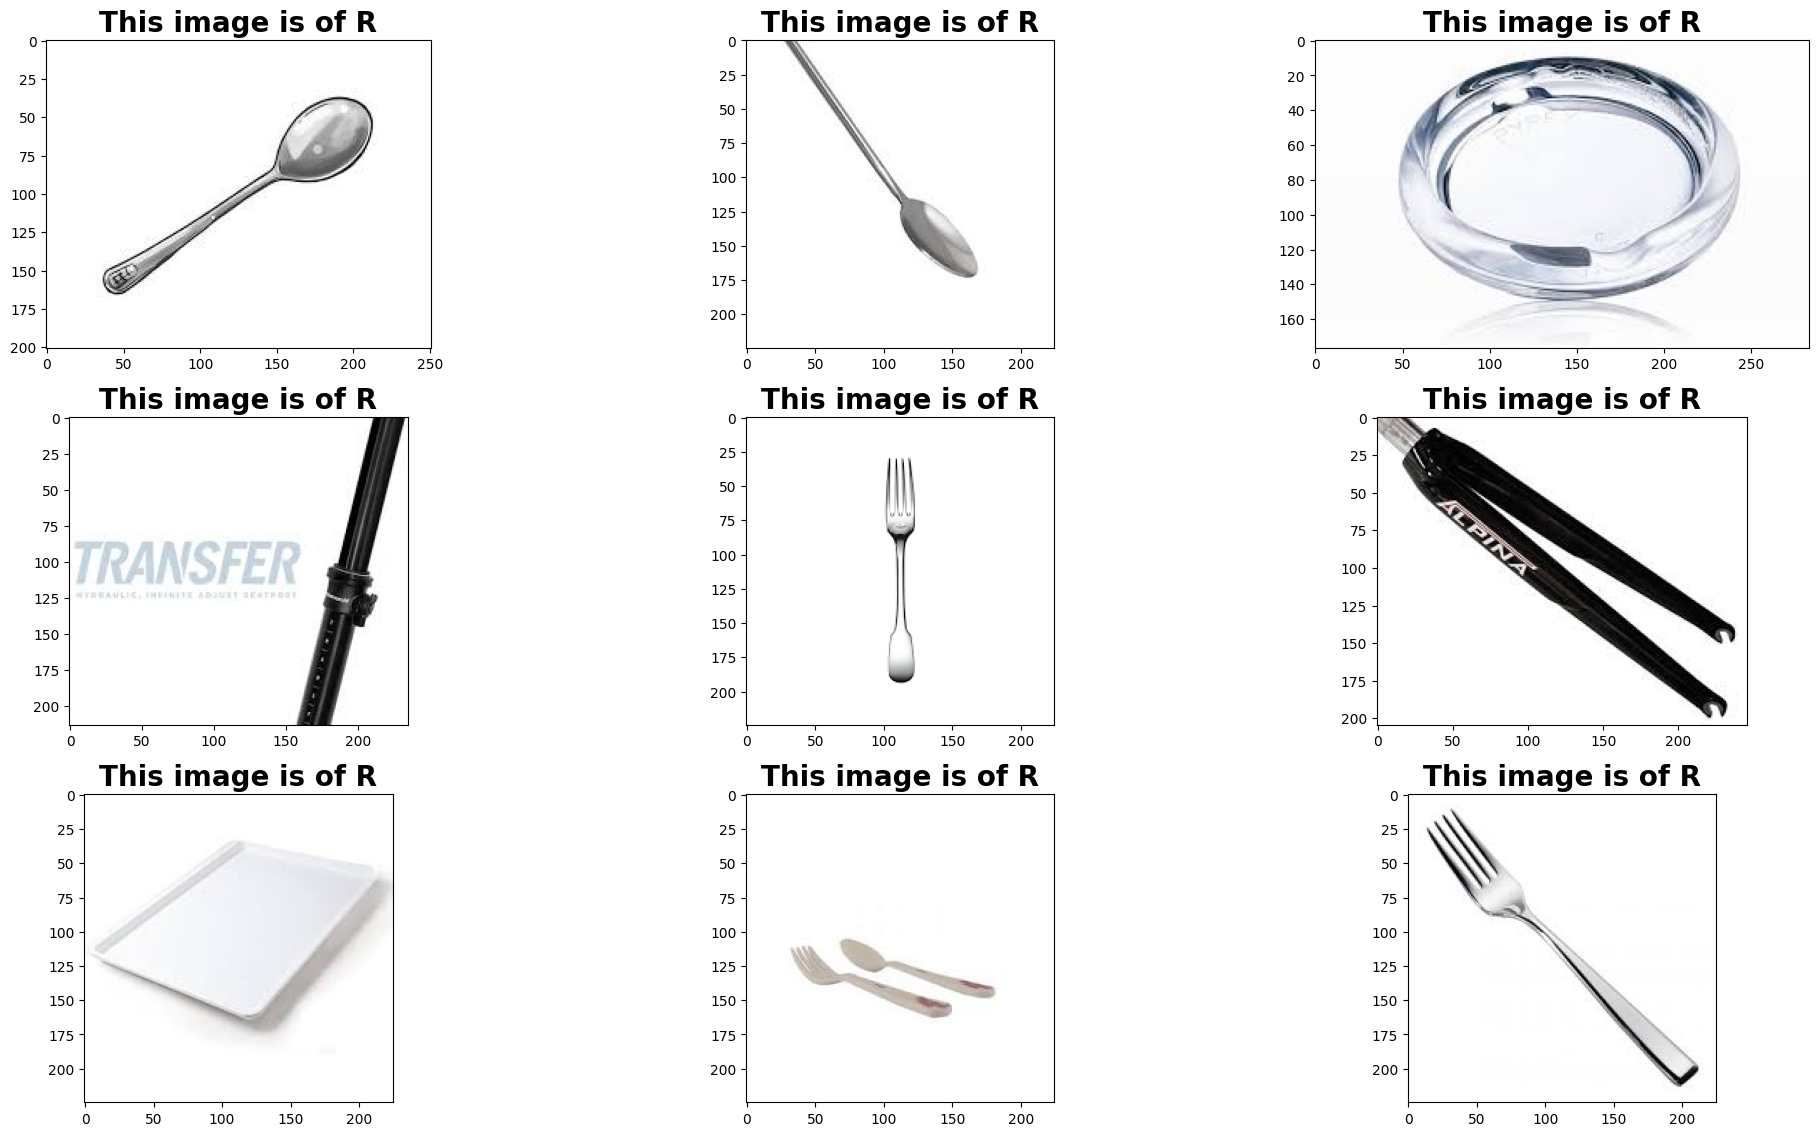

In [35]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(200)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [36]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [37]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [38]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 8630 images belonging to 2 classes.
Found 567 images belonging to 2 classes.


In [40]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
34/34 [==============================] - 39s 1s/step - loss: 0.7318 - accuracy: 0.7242 - val_loss: 0.3531 - val_accuracy: 0.8607
Epoch 2/10
34/34 [==============================] - 32s 937ms/step - loss: 0.4255 - accuracy: 0.8216 - val_loss: 0.3614 - val_accuracy: 0.8589
Epoch 3/10
34/34 [==============================] - 35s 1s/step - loss: 0.3906 - accuracy: 0.8359 - val_loss: 0.3120 - val_accuracy: 0.8783
Epoch 4/10
34/34 [==============================] - 36s 1s/step - loss: 0.3731 - accuracy: 0.8428 - val_loss: 0.3103 - val_accuracy: 0.8783
Epoch 5/10
34/34 [==============================] - 35s 1s/step - loss: 0.3331 - accuracy: 0.8608 - val_loss: 0.3029 - val_accuracy: 0.8871
Epoch 6/10
34/34 [==============================] - 35s 1s/step - loss: 0.3278 - accuracy: 0.8657 - val_loss: 0.2826 - val_accuracy: 0.8818
Epoch 7/10
34/34 [==============================] - 35s 1s/step - loss: 0.2984 - accuracy: 0.8725 - val_loss: 0.2793 - val_accuracy: 0.8889
Epoch 8/10
34/34 

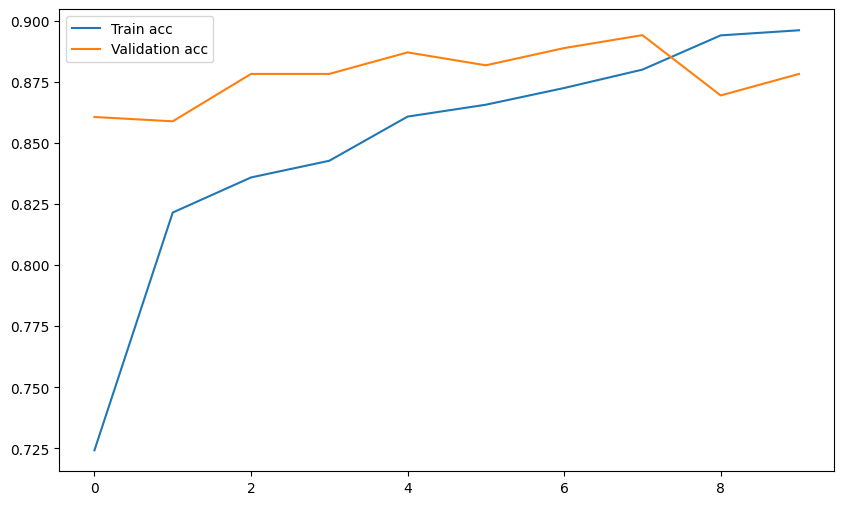

In [41]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

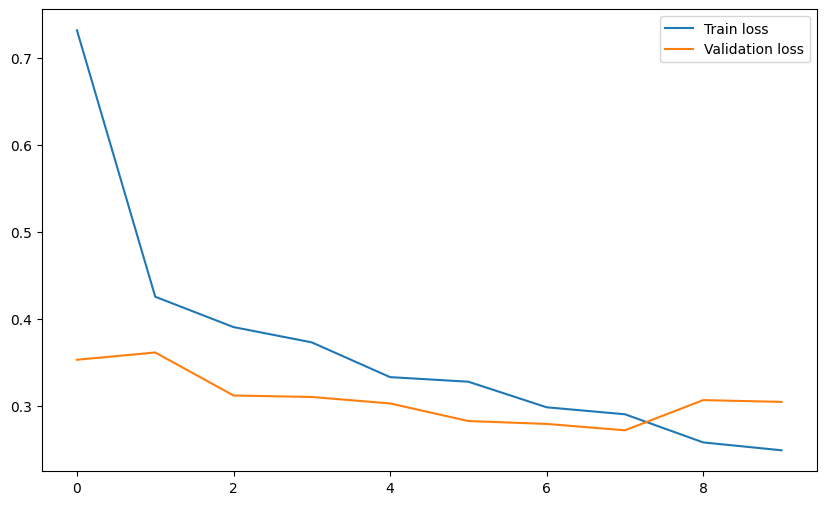

In [42]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [43]:
model.save('model.h5')

In [44]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

1/1 [==============================] - 0s 81ms/step
The predicted class is 1
Inorganic


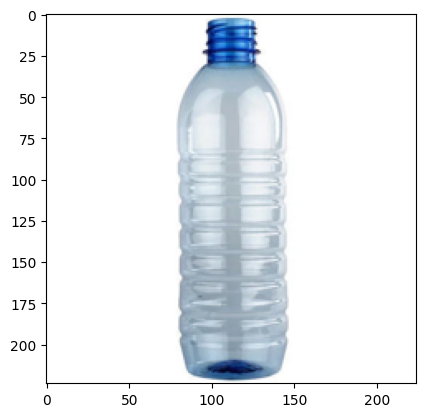

In [45]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('/content/bottle.webp')
img = img.resize((224, 224)) # Resize the image to 224x224 pixels
img = np.array(img) / 255.0 # Normalize the pixel values
plt.imshow(img)
x = np.expand_dims(img, axis=0) # Add an extra dimension for batch size
x = tf.convert_to_tensor(x) # Convert to a tensor
y_pred = model.predict(x)
y_pred_class = np.argmax(y_pred, axis=1) # Get the index of the class with the highest probability
print('The predicted class is', y_pred_class[0])

if y_pred_class[0]==0:
  print('Organic')
else:
  print('Inorganic')

# sustAIn

## Please upload the image using upload button

FileUpload(value={}, description='Upload Image')

## Please click on submit button

Button(description='Submit', style=ButtonStyle())

Output()

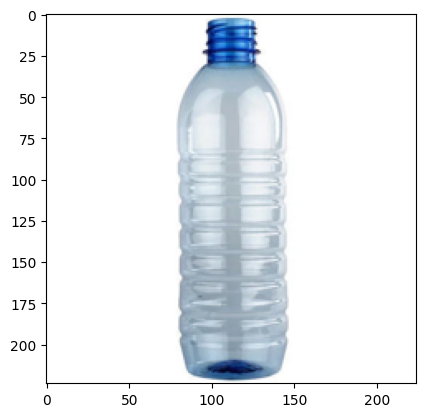

In [46]:
import ipywidgets as widgets
from IPython.display import display,Markdown
import io
from PIL import Image

# Create UI elements
project_name = Markdown('# sustAIn')
up_btn = Markdown('## Please upload the image using upload button')
upload_button = widgets.FileUpload(description='Upload Image')
cl_btn = Markdown('## Please click on submit button')
submit_button = widgets.Button(description='Submit')
output = widgets.Output()

# Define submit button click event handler
def on_submit_button_click(button):
  with output:
    if upload_button.value:
# Check if any files were uploaded
      uploaded_files = list(upload_button.value.values())
      if uploaded_files:
  # Read the first uploaded image
        image_bytes = uploaded_files[0]['content']
        image = Image.open(io.BytesIO(image_bytes))
        img = image.resize((224, 224)) # Resize the image to 224x224 pixels
        img = np.array(img) / 255.0 # Normalize the pixel values
        plt.imshow(img)
        x = np.expand_dims(img, axis=0) # Add an extra dimension for batch size
        x = tf.convert_to_tensor(x) # Convert to a tensor
        y_pred = model.predict(x)
        y_pred_class = np.argmax(y_pred, axis=1) # Get the index of the class with the highest probability
        print('The predicted class is', y_pred_class[0])

        if y_pred_class[0]==0:
          print('Organic')
          print("""
              Organic Waste Management Strategies
              1. Composting: Convert organic waste into nutrient-rich compost through natural decomposition.
              2. Anaerobic Digestion: Break down organic waste in a sealed container, producing biogas and nutrient-rich digestate.
              3. Vermicomposting: Use worms to transform organic waste into nutrient-rich vermicompost.
              4. Green Waste Recycling: Recycle grass clippings, leaves, and tree trimmings into mulch, compost, or wood chips.
              5. Community and Municipal Composting: Participate in local composting programs to divert organic waste from landfills.
              6. Industrial-Scale Recycling: Utilize advanced technologies for efficient processing and recycling of organic waste.""")
        else:
          print('Inorganic')
          print("""Inorganic Waste Management Strategies

          1. Reduce and Reuse: Minimize inorganic material usage and promote reuse.
          2. Recycling Programs: Establish effective recycling programs to transform inorganic waste into new products.
          3. Proper Disposal: Ensure safe disposal of hazardous inorganic waste through designated collection centers and specialized methods.
          4. Composting: Utilize composting techniques for inorganic waste to enrich the soil and promote natural decomposition.
          5. Education & Awareness: Raise public awareness and promote responsible inorganic waste management practices.

          """)

# Assign event handler to the submit button
submit_button.on_click(on_submit_button_click)

# Display UI elements
display(project_name)
display(up_btn)
display(upload_button)
display(cl_btn)
display(submit_button)
display(output)